In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")

df['day'] = pd.to_datetime(df['date'], dayfirst=True)

df = df.drop(['date'], axis = 1)

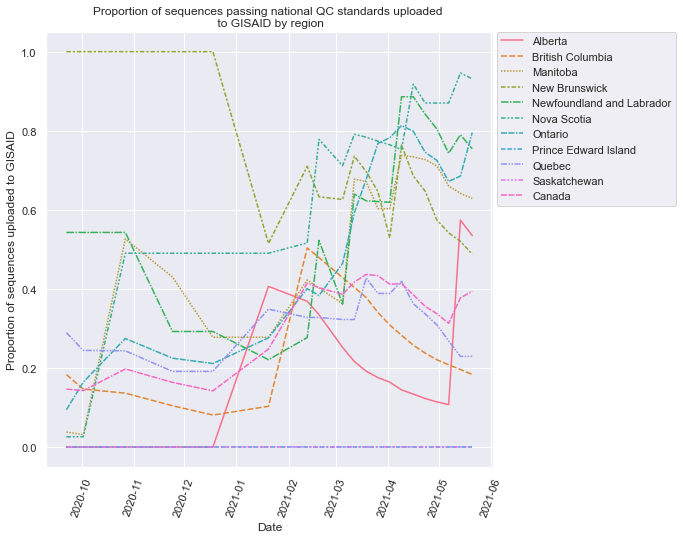

In [10]:
dims = (8, 8)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "day", y = "proportion", hue = "region", style = "region", data=df)
#plt.yscale("log")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Proportion of sequences passing national QC standards uploaded \n to GISAID by region")
plt.ylabel("Proportion of sequences uploaded to GISAID")
plt.xlabel("Date")
plt.xticks(rotation=70)

#plt.show()
plt.savefig('plots/GISAID_uploads.png', bbox_inches='tight')